# Session 1: Introduction to Conduction Heat Transfer

- Intros

- Syllabus: https://wesleychang.notion.site/MEM-611-Conduction-Heat-Transfer-65daf5db58d54e1683bac8ce927e674d?pvs=4 

- Communication platforms - Slack, Notion syllabus, courses.drexel.edu/mem/

- Programming aspects - Python 

- Reading the literature

- Project

- Survey

## Prelude

What do we want to learn in this class? 
- Heat transfer, but also: why heat transfer could be important to your graduate research, and what are some key practical takeaways for your research and future career aspirations 
- Conventionally: concepts, with a lot of math. Math is hard. Therefore, we'll use Python to do the legwork for us. Also, concepts can be nebulous. We'll use Python to visualize things and practical demos/projects to illustrate and test our understanding


## Introduction

What is heat transfer? **Heat transfer is thermal energy in transit due to a spatial temperature difference** 

Thermal energy in transit occurs due to movement of atoms and molecules (corresponding to their translational, rotational, vibrational, and electronic states, i.e. molecules twist, move, vibrate and change chemical composition)

Some practical applications of heat transfer:
- Thermoelectric coolers in computers and some refrigerators
- Air and liquid coolants for electric vehicle battery packs 
- What about charging and discharge a battery? (ask to draw out temperature curve)

Three modes of heat transfer
- Conduction: process of heat transfer by molecular motion, along with flow of free electrons and lattice vibrations from regions of high temperature to regions of low temperature
- Convection: process of heat transfer by movement of fluid 
- Radiation: process of heat transfer in the form of electromagnetic waves (i.e. materials emit radiation as a result of their temperature)
*in practice, heat transfer occurs by a combination of all 3, but for simplicity we focus on each aspect separately 

What is conduction? **Heat transfer that occurs across a medium**
- Temperature is generally associated with the energy of gas molecules in proximity to a reference point, and is related to both random translational motion and internal rotational and vibrational motions of molecules
- However, engineers don't really care about every single molecular action. We work with practical devices like batteries, automobiles and HVAC systems, so generally we assume a macroscopic average. 

<img src="images/heat transfer image 1.jpeg">
<img src="images/heat transfer image 2.jpeg">
<img src="images/heat transfer image 3.jpeg">
<img src="images/heat transfer image 4.jpeg">
<img src="images/heat transfer image 5.jpeg">
<img src="images/heat transfer 6.jpeg">


### Thermo redux
- A **system** is an arbitrary collection of matter of fixed identity, bounded by a closed surface. Everything else is known as the **surroundings** 
- 1st Law of Thermo: $$ dE = \delta Q - \delta W $$ for an infinitesimal change of state during time interval dt (i.e. "energy cannot be created or destroyed, only transferred")
- 2nd Law of Thermo: a system cannot move heat from low to high temperature if unaided by something external $$ dS\ = \frac{\delta Q}{T}_{rev} $$
    - for an irreversible process, $$dS\ > \ \delta Q/T $$

### Fourier's Law of Heat Conduction
- Consider a solid flat plate of thickness L (other dimensions are much larger). Let T1 and T2 be the two surface temperatures and A the surface area. From the 2nd Law, we know heat will flow from the higher temp (say T1) to the lower temp (say T2) surface. 

**if there is a temperature difference, then heat will flow**

### Rate of heat transfer through solid flat plate under steady-state conditions and no internal energy sources or sinks 

* what does steady-state mean, mathematically and conceptually? 
* what could be an internal energy source or sink? 

Consider a thin slab of the plate to be the system, if there is no internal energy source or sink, then $$ q(x) = q(x + \Delta x) $$ In other words, the flow of heat in is equivalent to the flow of heat out. 

As $$ \Delta x \Rightarrow 0,\ q(x+\Delta x) = q(x) + dq/dx \Delta x $$ and $$ dq/dx = 0 $$, or q = constant

**therefore, heat flow is constant if the two surface temperatures in a 1D steady state system (without any internal energy) is constant**

Empirically, q is found to be directly proportional to surface area A and the temperature difference (T1 - T2), and inversely proportional to thickness L: $$ q \sim A*\frac{T1 - T2}{L} $$, or the instantaneous temperature change: $$ q = -kA \frac{dT}{dx} $$, which is Fourier's Law of Heat Conduction for a one-dimensional system. 

k has units of W/m-K and is called the **thermal conductivity**

<img src="images/thermal_conductivity.jpeg">
<img src="images/thermal_conductivity2.jpeg">

The heat flux is the amount of heat transferred per unit time across unit area: $$ q" = q/A = -k \frac{dT}{dx} $$

### Expression for the steady-state temperature distribution for a flat plate with thickness L 

From above, $$ dq/dx = 0 $$, and $$ q = -kA \frac{dT}{dx} $$, so $$ \frac{d}{dx}(-kA \frac{dT}{dx}) = 0 $$

since k and A are invariant with x, $$ \frac{d^{2}T}{dx^{2}} = 0 $$ and $$ T(x) = ax + b $$ 

taking boundary conditions $$ T(x = 0)\ = T_1 \\ T(x = L)\ =\ T_2 \\ B = T_1 \\ A = \frac{T_2-T_1}{L} $$

therefore, $$ T(x) = \frac{T_2 - T_1}{L}x + T_1 $$

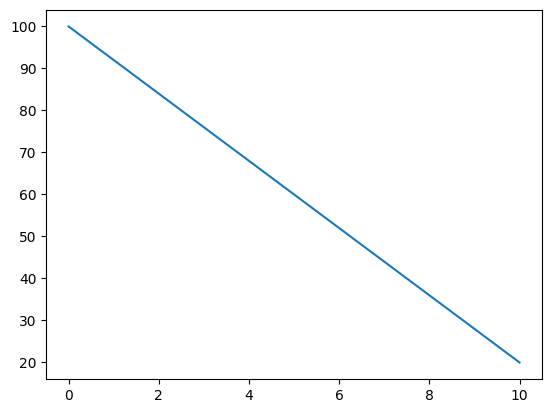

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

L = 10 #cm
T1 = 100 #Celsius
T2 = 20 #Celsius

x = np.linspace(0, 10, 100)
T = (T2-T1)/L * x + T1

figure = plt.figure(1)
ax1 = figure.add_subplot(111)

ax1.plot(x,T)

plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (99,)

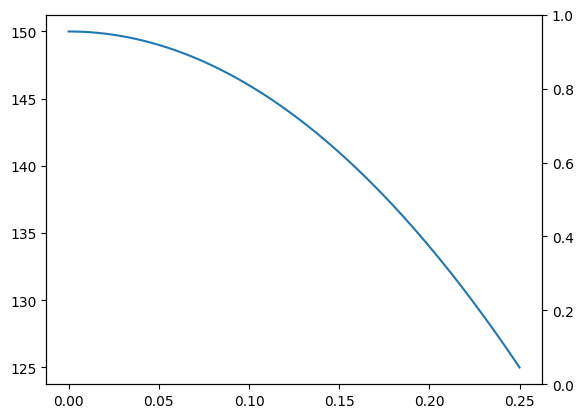

In [2]:
L = 0.25 #meters
k = 40 #W/m-K

x = np.linspace(0, 0.25, 100)
T = 150 - 400*x**2

figure = plt.figure(1)
ax1 = figure.add_subplot(111)
ax1.plot(x,T)
ax11 = ax1.twinx()
ax11.plot(x, -k * np.diff(T)/np.diff(x))

plt.show()

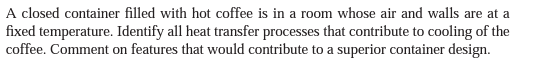


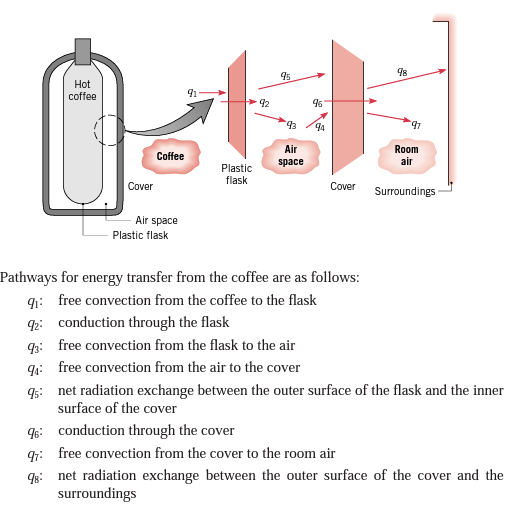

(show how to use terminal commands)

## General Heat Conduction Equation

At a molecular level, heat is conducted via exchange of kinetics energy as molecules vibrate. At the macroscopic level, the medium is considered to be a continuum (i.e. these molecular motions are all averaged out and we only "see" the general trend)

How was the general heat conduction equation derived?

**(1) Law of mass conservation**

The law of mass conservation of a system allows us to draw a mass balance to a fixed volume. We consider an arbitrarily shaped volume, with mass that enters and exits. 

$$\delta m/ \delta t\ =\ \delta / \delta t \int _{vol}\ \rho dV$$ 
where dV is a small volume element inside the fixed volume shape

$$\delta / \delta t \int _{vol}\ \rho dV\ =\ \dot m_{in}\ -\ \dot m_{out}\ =\ -\int _A \rho \dot x* \hat{n} dA\ -\ \int _A \rho \dot x* \hat{n} dA\ =\ -\int _{surf} \rho dV \hat{n} dA\ =\ -\int _{vol} \nabla (\rho \dot x) dV$$

where the last step is taken from the Divergence Theorem

therefore, $$\int_{vol} [\delta \rho/\delta t\ +\ \nabla (\rho V)]dV\ =\ 0 $$

**(2) First Law of Thermo, expanded**

recall the simplified form: $$dE/dt\ =\ q\ - \dot{w} $$

taking an energy balance, analogous to the mass balance from before, we can take the instantaneous form as $$\Delta t\ \rightarrow\ 0 $$

$$\delta / \delta t \int _{vol} e\rho dV\ +\ \int _A e\rho \dot{x}* \hat{n} dA\ - \int _A e\rho V* \hat{n} dA$$

$$\delta / \delta t \int _{vol} e\rho dV\ +\ \int _{surf} e\rho \dot{x}* \hat{n} dA\ =\ q_{surf}\ -\ \dot{w} $$

again, applying the divergence theorem to convert the surface integral into a volume integral and simplify:

$$\int_{vol} \rho (\delta e/ \delta t\ +\ \dot{x}*\nabla e)dV\ =\ q_{surf}\ -\ \dot{w} $$

this is the First Law of Thermo for a control volume.

**(3) General Equation for Heat Conduction**

considering a stationary object, the velocity component is zero

$$\int_{vol} \rho \delta e/\delta t dv\ =\ q_{surf}\ +\ \int_{vol} \dot{q} dV $$

where q_{surf} is the net heat rate conducted into the volume across its surface and the second term is heat generation from an internal energy source

$$\int_{vol} \rho \delta u/dt dV\ =\ q_{surf}\ +\ \int_{vol} \dot{q} dV$$

for solids and incompressible fluids, $$c\ =\ du/dT $$
for stationary solid with no other rxns, $$de\ =\ du $$

$$\int_{vol} \rho c dT/dt dV\ =\ -\int _{surf} q"*\hat{n} dS\ +\ \int _{vol}\ \hat{q} dV$$

apply divergence theorem to first term on RHS:

$$\int_{vol} \rho c dT/dt dV\ =\ -\int _{vol} \nabla q"*dV\ +\ \int _{vol}\ \hat{q} dV$$

$$\int_{vol} [\rho c \delta T/\delta t\ +\ \nabla*q"\ -\ \dot{q}]dV =\ 0$$

$$-\nabla *q"\ +\ \dot{q}\ =\ \rho c \delta T/\delta t$$

since $$q"\ =\ -k\nabla T $$

$$k \nabla^2 T + \nabla k \nabla T\ +\ \dot q= \rho c* \delta T / \delta t $$

**(4) Other variations of the equation**

for a homogeneous isotropic solid (constant k), we obtain the Fourier-Biot equation:

$$\nabla^2 T\ +\ \dot q/k\ =\ 1/\alpha* \delta T/ \delta t $$

at steady-state (Poisson equation):

$$\nabla^2 T\ + \dot{q}/k\ =\ 0 $$ 

and without internal heat source or sink (Laplace equation):

$$\nabla^2 T\ =\ 0 $$


## Downloading Python interpreter

- a Python interpreter allows you to write and execute Python code
- most computers come with Python built in, you just need to download an interpreter to work with it
- Jupyter Notebooks are a common way to write in Python, or you may have heard of PyCharm and Anaconda. I prefer VS Code, because I think it looks nicer, easily integrates with git for collaborative coding and projects, and you can also use jupyter notebooks or write in any other code using VS code
- one common annoyance with using Python is package dependency issues. python consists of lots of different packages to do things, written by other people. these packages often depend on other packages, you can imagine if you have a bunch, there may be issues where one package depends on a certain version of another package, which has to be another version bcs of this other package,...etc. So, to avoid this, it's best to NOT use your system python, but instead, create a virtual environment for each project. In this case, anytime you are working in the virtual environment and downloading packages, these packages do not get downloaded to your system pyton, only to the version that's virtualized. 

## Instructions

1. get VS Code or other python interpreter, open a new file save as test.py or test.ipynb (for Jupyter notebook) and make sure it works/runs 
2. ideally, work inside a virtual environment

### Activating virtual python environment to avoid dependency issues

`/usr/bin/python3 -m venv env
source env/bin/activate`

The command **`/usr/bin/python3 -m venv env`** creates a virtual environment (venv) for a Python3 application.

Here's a breakdown of the command:

- **`/usr/bin/python3`**: This specifies the location of the Python 3 executable on your system.
- **`m venv`**: The **`m`** option is used to run a module as a script. In this case, the **`venv`** module is being run, which is used to create virtual environments.
- **`env`**: This is the name of the virtual environment that will be created. The virtual environment will be located in a directory named **`env`**.

When you run this command, a new virtual environment will be created in the **`env`** directory, isolated from the system-wide Python installation and packages. This allows you to install packages in the virtual environment without affecting the system-wide installation or other virtual environments.

You can activate the virtual environment by running the command **`source env/bin/activate`** in the terminal, after which the terminal prompt will change to indicate that you're in the virtual environment. To exit the virtual environment, simply run the command **`deactivate`**.

3. download useful packages: pip install numpy pandas matplotlib scipy

https://drexel.qualtrics.com/jfe/form/SV_6GtC94D4iVRUqsS

## Problem Set 1 

1. Get a Python environment setup if not already 
    (a) (optional) get a virtual python environment running on your computer so you don't mess up your base python https://chang-lab.notion.site/PyEnv-dcd09b09366946b4a8b612315a3ad4e5?pvs=4 
    (b) download a python interpreter (VS Code is a good one)
2. The steady-state temperature distribution in a flat plate is given by the following expression: $$ T = 150 - 400x^2 $$
where x is the distance in meters (m) along the width of the plate and is measured from the surface at 150 degrees Celsius. thermal conductivity is 40 W/m-K and thickness is 0.25 m. What is the heat flux at each surface? 
    a) draw schematic
    b) define assumptions 
    c) define boundary conditions and general equation
    d) solve
